# ARIMA --> Autoregressive Integrated Moving Averages
Visualize Time Series Data

Make Time series data stationary

Plot the Correlation and AutoCorrelation Charts

Construct the ARIMA model or Seasonal ARIMA  based on data

Use the model to make prediection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Perrin Freres monthly champagne sales millions.csv')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.columns=['Month','Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
df.drop(105,axis=0,inplace=True)
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
106,Perrin Freres monthly champagne sales millions...,NaN


In [9]:
# Remove rows where 'Month' column is not a valid date
df = df[pd.to_datetime(df['Month'], errors='coerce').notnull()]

# Now safely convert
df['Month'] = pd.to_datetime(df['Month'])
df.head()


,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [10]:
df.set_index('Month',inplace=True)

In [11]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [12]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<Axes: xlabel='Month'>

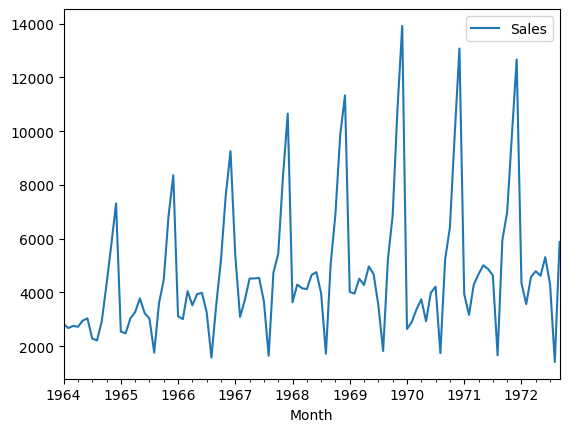

In [13]:
df.plot()

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
test_result =adfuller(df['Sales'])

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result,labels):
        print(label+':'+str(value))
    if result[1] <= 0.05:
        print('Strong Evidence against Null Hypothesis. Reject Null Hypothesis. Data has no root unit and is Stationary')
    else:
        print('Weak Evidence against Null Hypothesis. Failed to reject Null Hypothesis. Time Series has a unit root and is Non-Stationary')

In [17]:
adfuller_test(df['Sales'])

ADF Test Statistic:-1.8335930563276195
p-value:0.3639157716602467
#Lags Used:11
Number of Observations Used:93
Weak Evidence against Null Hypothesis. Failed to reject Null Hypothesis. Time Series has a unit root and is Non-Stationary


In [18]:
df['Sales Diff'] = df['Sales'] - df['Sales'].shift(1)

In [19]:
df['Seasonal Diff'] = df['Sales']-df['Sales'].shift(12)

In [22]:
df.head(20)

,Sales,Sales Diff,Seasonal Diff
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [23]:
adfuller_test(df['Seasonal Diff'].dropna())

ADF Test Statistic:-7.626619157213166
p-value:2.0605796968136632e-11
#Lags Used:0
Number of Observations Used:92
Strong Evidence against Null Hypothesis. Reject Null Hypothesis. Data has no root unit and is Stationary


<Axes: xlabel='Month'>

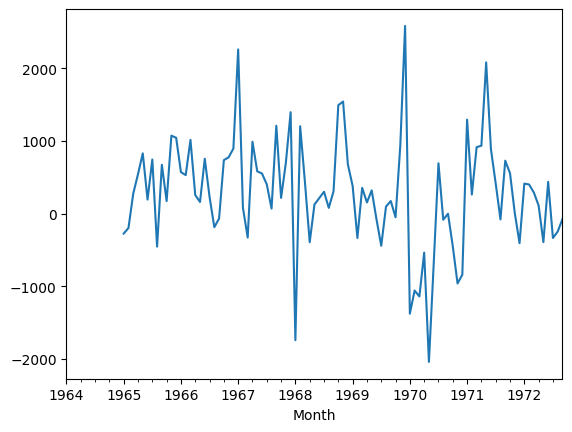

In [24]:
df['Seasonal Diff'].plot()

# Auto Regressive Model

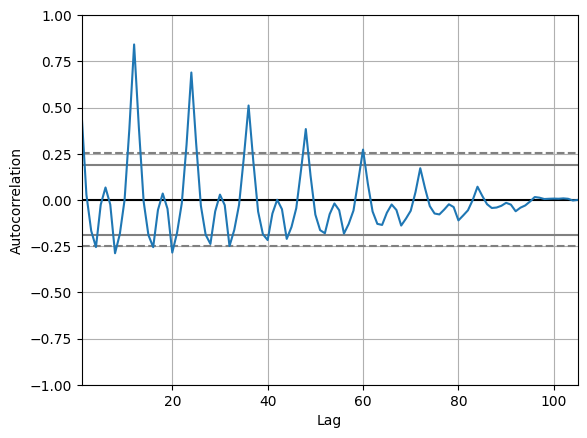

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Sales'])
plt.show()


# PACF 

The Partial Autocorrelation Function (PACF) is a concept in time series analysis used to understand the relationship between points in a time series that are separated by a specific number of time steps. Unlike regular autocorrelation, which includes both direct and indirect relationships, PACF measures only the direct relationship between a value and another value at a fixed distance in time, removing the influence of any values that lie in between. This makes it a useful tool for identifying the true dependency structure in a time series. It helps analysts determine how much of the current value is directly influenced by past values at specific lags, without interference from intermediate lags. PACF is commonly used to identify how many past time points should be included when building predictive time series models. If the PACF drops off sharply after a certain point, it suggests that only a limited number of past observations have a direct influence, which can simplify model selection.

In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels as sm

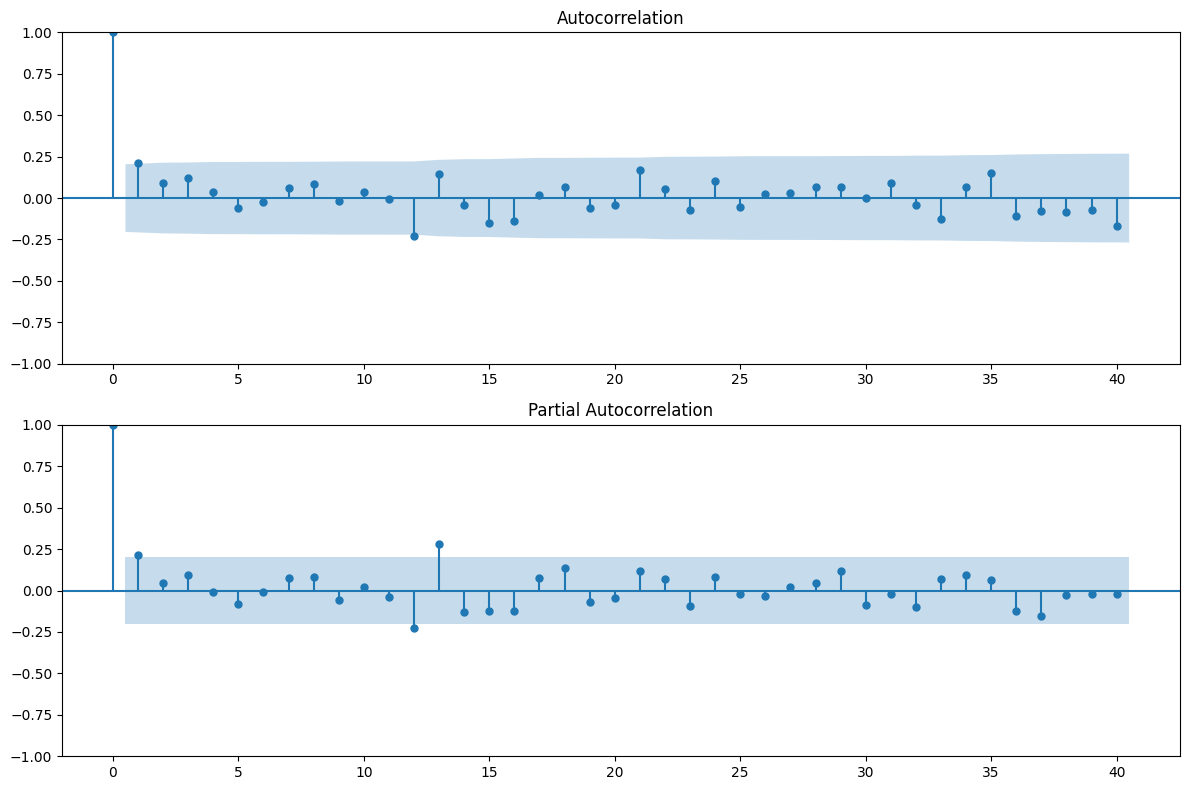

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(df['Seasonal Diff'].iloc[13:], lags=40, ax=ax[0])
plot_pacf(df['Seasonal Diff'].iloc[13:], lags=40, ax=ax[1])

plt.tight_layout()
plt.show()

# ARIMA
is a popular statistical model used in time series forecasting. It captures patterns based on the idea that future values depend on past values and past errors. The model combines three components: one that represents the relationship between past values, another that accounts for the differencing needed to make the series stationary, and a third that includes the impact of past forecast errors. It works well when the data shows consistent trends or patterns over time but no strong seasonal cycles. ARIMA assumes the underlying data is stable in mean and variance after transformation and is typically used when the data is univariate and not influenced by external factors.

# SARIMAX
extends the ARIMA model by including support for seasonality and external variables. It can handle time series data that exhibit regular seasonal patterns and can also incorporate additional explanatory variables that might influence the time series. This makes SARIMAX suitable for more complex, real-world forecasting problems where seasonality and external events play a significant role. It generalizes ARIMA by allowing for seasonal behavior, trend components, and the influence of multiple variables over time.


In [36]:
from statsmodels.tsa.arima.model import ARIMA

In [37]:
model = ARIMA(df['Sales'], order=(1,1,1))
model_fit=model.fit()

C:\Users\gaikw\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gaikw\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gaikw\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [38]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Sun, 06 Jul 2025   AIC                           1911.627
Time:                        15:51:02   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
adfuller_test(df['Seasonal Diff'].dropna())

ADF Test Statistic:-7.626619157213166
p-value:2.0605796968136632e-11
#Lags Used:0
Number of Observations Used:92
Strong Evidence against Null Hypothesis. Reject Null Hypothesis. Data has no root unit and is Stationary


<Axes: xlabel='Month'>

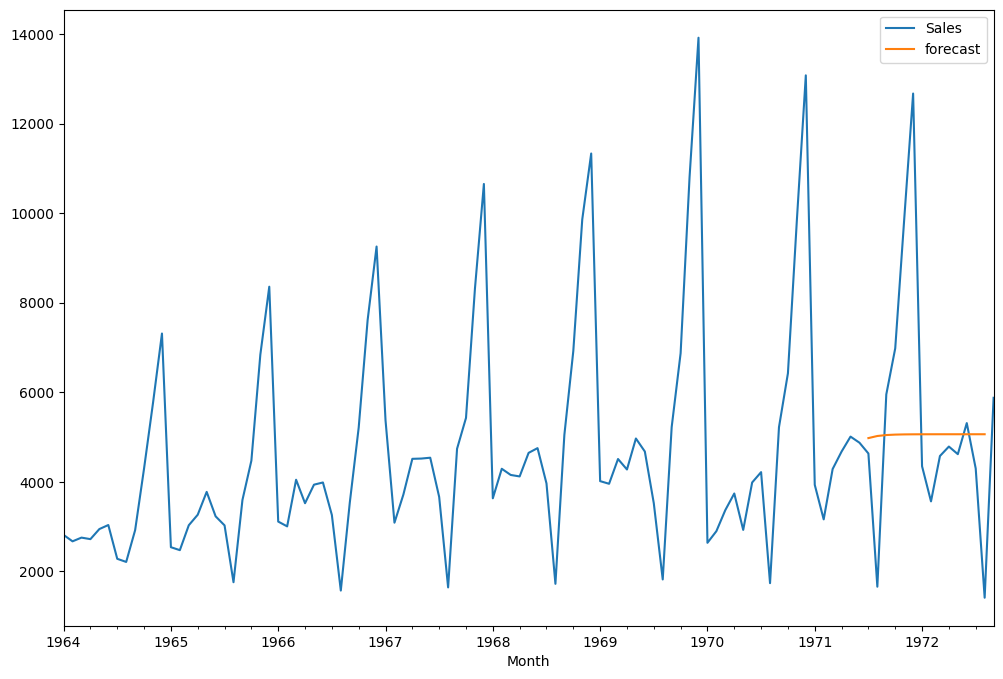

In [41]:
df['forecast'] = model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [43]:
import statsmodels.api as sm

In [44]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\gaikw\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gaikw\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

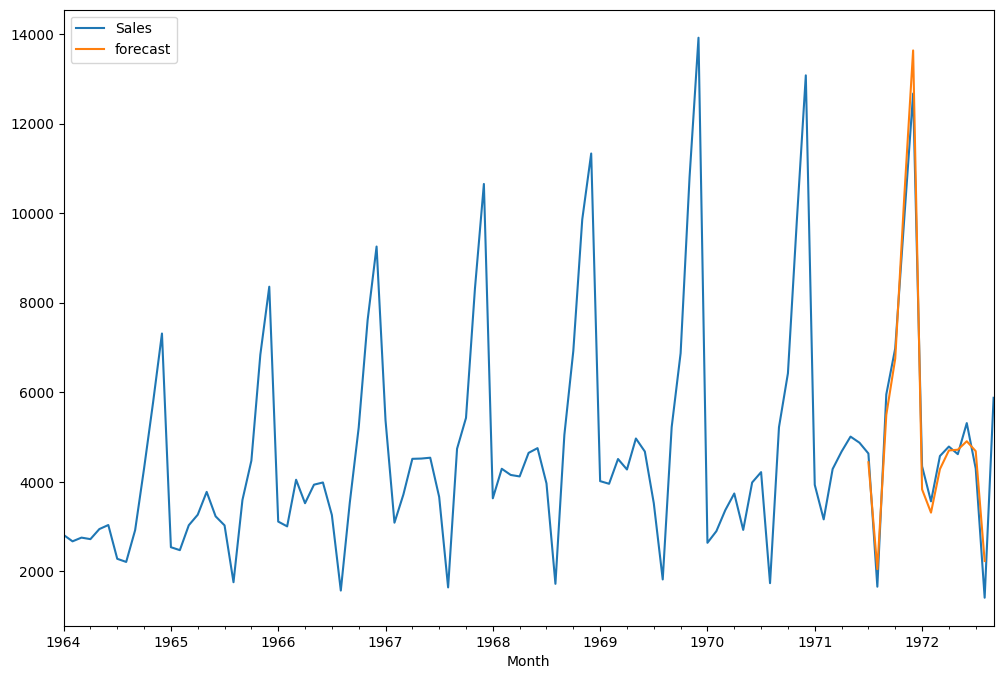

In [45]:
df['forecast'] = results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [48]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1] + DateOffset(months=x)for x in range(0,24)]

In [49]:
future_dataset_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [50]:
future_dataset_df.head()

,Sales,Sales Diff,Seasonal Diff,forecast
1972-10-01,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN


In [51]:
future_dataset_df.tail()

,Sales,Sales Diff,Seasonal Diff,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [52]:
future_df =pd.concat([df,future_dataset_df])

C:\Users\gaikw\AppData\Local\Temp\ipykernel_10340\1995860641.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df =pd.concat([df,future_dataset_df])


<Axes: >

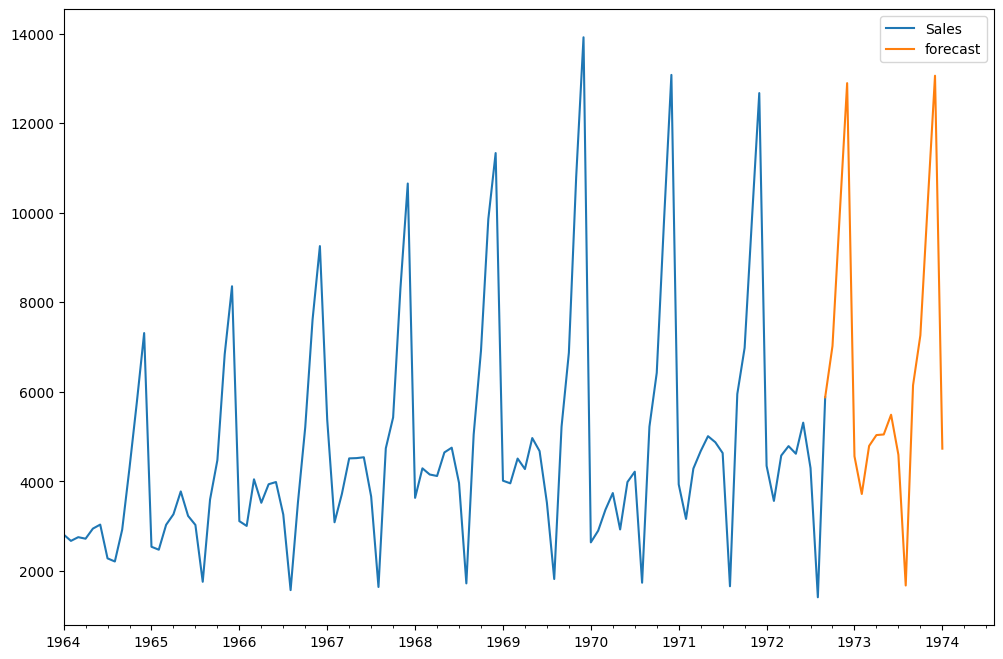

In [53]:
future_df['forecast'] = results.predict(start=104,end=120,dynamic=True)
future_df[['Sales','forecast']].plot(figsize=(12,8))